## 1. 문제 제기
* 주제 : 뇌졸증(stroke) 발병 요인 중 중요한 변수는 무엇인가?

## 2. 데이터 구하기
* 캐글 사이트 : Stroke Prediction Dataset
* data 디렉토리에 저장하기 

## 3. 타겟변수 설정
* 타겟변수명 : stroke
* 타겟변수값 : 과거에 한 번이라도 뇌졸증이 발병했으면1, 아니면 0

## 4. 데이터 처리
* 4-1 데이터 불러오기
* 4-2 ID 변수 설정
* 4-3 타겟변수 생성
* 4-4 기타 변수 데이터 처리
* 결과 파일 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

### 4-1. 데이터 불러오기

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('태양광_데이터_통합.csv', encoding="cp949")

df.head(3)

,날짜,발전기명,최고기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균 전운량(1/10),발전량(kWh)
0,2021-06-01,광양항광양냉장태양광,28.8,15.4,NaN,0.9,4.9,4.244454
1,2021-06-02,광양항광양냉장태양광,28.6,17.7,NaN,0.8,7.9,3.248909
2,2021-06-03,광양항광양냉장태양광,20.6,17.9,22.0,1.2,9.6,0.729910


In [3]:
# 데이터프레임 df행과 열 차원 확인
df.shape

(4887, 8)

In [4]:
# 데이터프레임 df 정보(info) 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4887 entries, 0 to 4886
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   날짜            4887 non-null   object 
 1   발전기명          4887 non-null   object 
 2   최고기온(℃)       4887 non-null   float64
 3   최저기온(℃)       4887 non-null   float64
 4   강수량(mm)       1744 non-null   float64
 5   평균풍속(m/s)     4886 non-null   float64
 6   평균 전운량(1/10)  4885 non-null   float64
 7   발전량(kWh)      4887 non-null   float64
dtypes: float64(6), object(2)
memory usage: 305.6+ KB


### 4-2 강수량(mm) 변수 설정
* ID 변수 데이터 타입
* 결측값
* 중복 여부
* 숫자가 아닌 값

In [5]:
# ID 변수인 id  데이터 타입 확인
df['강수량(mm)'].dtype

dtype('float64')

In [6]:
# ID 변수인 id 값의 결측값 확인
df['강수량(mm)'].isnull().sum()

3143

In [7]:
# ID 변수인 id 값의 중복 여부를 체크하기 위해 유일한(unique) 값의 개수 체크
n = len(pd.unique(df['강수량(mm)']))  # pd.unique는 유일한 변수값을 출력하고 len은 값의 개수를 카운트 한다.
n

235

In [8]:
#  숫자형태가 아닌 SERIALNO의 갯수를 세튼 파이썬 코드
mask = pd.to_numeric(df['강수량(mm)'], errors='coerce').isna()
a=mask.sum()
a

3143

### 4-3. 타겟 변수 생성

In [9]:
# 타켓변수 데이터 타입 확인
df['발전량(kWh)'].dtype

dtype('float64')

In [10]:
# 타켓변수 결측값 확인.
df['발전량(kWh)'].isnull().sum()

0

### 4-4 기타 변수 데이터 처리

In [11]:
# 구간 변수를 cols에 저장
cols = ['최고기온(℃)','최저기온(℃)','강수량(mm)', '평균풍속(m/s)' ,'평균 전운량(1/10)']

# 구간 변수 데이터 타입 확인
df[cols].dtypes

최고기온(℃)         float64
최저기온(℃)         float64
강수량(mm)         float64
평균풍속(m/s)       float64
평균 전운량(1/10)    float64
dtype: object

In [12]:
# 소숫점 2자리로 숫자 표기 제한
pd.options.display.float_format = '{:.2f}'.format

In [13]:
# 구간 변수 기초 통계량 확인
df[cols].describe()

,최고기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균 전운량(1/10)
count,4887.00,4887.00,1744.00,4886.00,4885.00
mean,19.56,9.28,9.76,2.04,5.18
std,9.43,10.30,22.94,1.16,2.76
min,-5.20,-14.90,0.00,0.20,0.00
25%,12.00,0.55,0.10,1.20,3.00
50%,21.30,9.70,1.45,1.80,5.40
75%,27.40,18.80,9.20,2.60,7.40
max,36.50,26.80,279.20,8.80,10.00


## 5. 탐색적 자료분석 및 시각화
* 5-1 결측값 50% 초과 변수 제거
* 5-2 요약 통계 및 도수분포표 점검
* 5-3 이상값 제거
* 5-4 상관관계 검토
* 5-5 시각화 (구간 변수, 범주형 변수)
* 5-6 t-검정
* 결과 파일 

### 5-1 결측값 50% 초과 변수 제거

In [14]:
# 결측값을 갖고 있는 변수명(컬럼명) 찾기
df.isna().any()[lambda x : x]

강수량(mm)         True
평균풍속(m/s)       True
평균 전운량(1/10)    True
dtype: bool

In [15]:
# 강수량(mm)의 결측값 비율 확인.
df['강수량(mm)'].isnull().mean()

0.643134847554737

In [16]:
df['평균풍속(m/s)'].isnull().mean()

0.0002046245140167792

In [17]:
df['평균 전운량(1/10)'].isnull().mean()

0.0004092490280335584

### 5-2. 요약 통계 및 도수분포표 점검

In [18]:
# 구간 변수를 cols에 저장.
cols = ['최고기온(℃)','최저기온(℃)','강수량(mm)', '평균풍속(m/s)' ,'평균 전운량(1/10)']

# 구간(interval) 변수의 요약통계 구하기
df[cols].describe()

,최고기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균 전운량(1/10)
count,4887.00,4887.00,1744.00,4886.00,4885.00
mean,19.56,9.28,9.76,2.04,5.18
std,9.43,10.30,22.94,1.16,2.76
min,-5.20,-14.90,0.00,0.20,0.00
25%,12.00,0.55,0.10,1.20,3.00
50%,21.30,9.70,1.45,1.80,5.40
75%,27.40,18.80,9.20,2.60,7.40
max,36.50,26.80,279.20,8.80,10.00


In [19]:
# df 왜도 점검.(-2~2)
df[cols].skew()

최고기온(℃)        -0.43
최저기온(℃)        -0.21
강수량(mm)         5.48
평균풍속(m/s)       1.48
평균 전운량(1/10)   -0.16
dtype: float64

In [20]:
# df1 첨도 점검.
df[cols].kurtosis()

최고기온(℃)        -0.83
최저기온(℃)        -1.19
강수량(mm)        41.25
평균풍속(m/s)       3.22
평균 전운량(1/10)   -0.97
dtype: float64

### 5-3 이상값 제거 (3*IQR 적용)

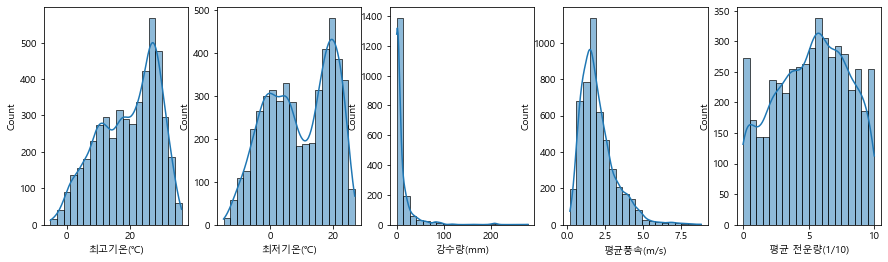

In [21]:
# 구간 변수 분포 히스토그램 그리기.
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

fig, axes = plt.subplots(1, 5, figsize=(15,4))

sns.histplot(ax=axes[0], data=df, x='최고기온(℃)', kde=True, bins=20);
sns.histplot(ax=axes[1], data=df, x='최저기온(℃)', kde=True, bins=20);
sns.histplot(ax=axes[2], data=df, x='강수량(mm)', kde=True, bins=20);
sns.histplot(ax=axes[3], data=df, x='평균풍속(m/s)', kde=True, bins=20);
sns.histplot(ax=axes[4], data=df, x='평균 전운량(1/10)', kde=True, bins=20);
plt.show()

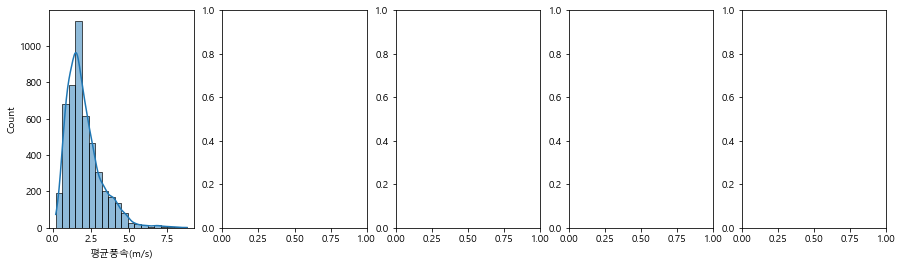

In [22]:
fig, axes = plt.subplots(1, 5, figsize=(15,4))
sns.histplot(ax=axes[0], data=df, x='평균풍속(m/s)', kde=True, bins=20);
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

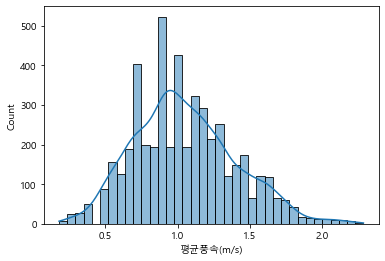

In [23]:
#로그  변환 그래프
log_SalePrice = np.log1p(df['평균풍속(m/s)'])
sns.histplot(log_SalePrice, kde = True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

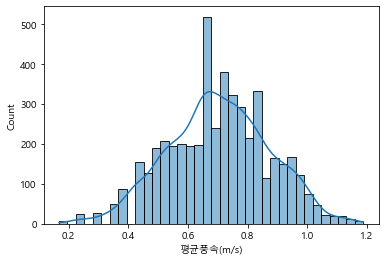

In [24]:
#로그  변환 그래프
log_SalePrice = np.log1p(log_SalePrice)
sns.histplot(log_SalePrice, kde = True)
plt.show

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

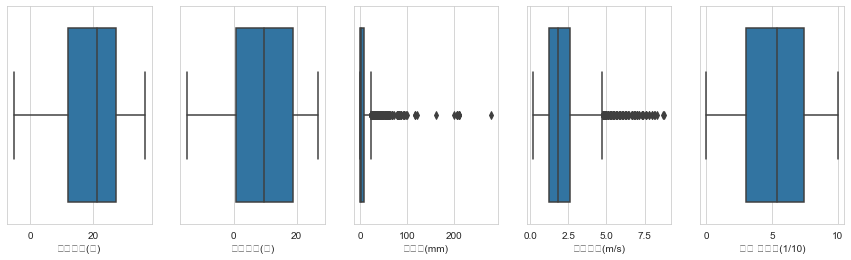

In [26]:
# 구간 변수 분포 상자그림 그리기.
sns.set_style('whitegrid')

fig, axes = plt.subplots(1,5, figsize=(15, 4))

sns.boxplot(ax=axes[0], x='최고기온(℃)', data=df);
sns.boxplot(ax=axes[1], x='최저기온(℃)', data=df);
sns.boxplot(ax=axes[2], x='강수량(mm)', data=df);
sns.boxplot(ax=axes[3], x='평균풍속(m/s)', data=df);
sns.boxplot(ax=axes[4], x='평균 전운량(1/10)', data=df);

In [27]:
df['강수량(mm)'] = df['강수량(mm)'].fillna(0)
df = df.dropna(0)
data = df[[
    '최고기온(℃)',
    '최저기온(℃)',
    '강수량(mm)',
    '평균풍속(m/s)',
    '평균 전운량(1/10)'
]] # 타켓변수를 제외한 변수만 data에 저장

target = df['발전량(kWh)']              # 타켓변수만 target에 저장.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4884 entries, 0 to 4886
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   최고기온(℃)       4884 non-null   float64
 1   최저기온(℃)       4884 non-null   float64
 2   강수량(mm)       4884 non-null   float64
 3   평균풍속(m/s)     4884 non-null   float64
 4   평균 전운량(1/10)  4884 non-null   float64
dtypes: float64(5)
memory usage: 228.9 KB


In [28]:
# 구간 변수 IQR(Inter Quartile Range) 구하기.
Q1 = df[['최고기온(℃)','최저기온(℃)','강수량(mm)', '평균풍속(m/s)' ,'평균 전운량(1/10)']].quantile(0.25)
Q3 = df[['최고기온(℃)','최저기온(℃)','강수량(mm)', '평균풍속(m/s)' ,'평균 전운량(1/10)']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

최고기온(℃)        15.40
최저기온(℃)        18.30
강수량(mm)         0.20
평균풍속(m/s)       1.40
평균 전운량(1/10)    4.40
dtype: float64


In [29]:
# IQR 3.0 규칙에 의한 상한과 하한 구하기.
Lower = Q1-3.0*IQR
Upper = Q3+3.0*IQR

# 하한 출력.
print(Lower)

최고기온(℃)        -34.20
최저기온(℃)        -54.40
강수량(mm)         -0.60
평균풍속(m/s)       -3.00
평균 전운량(1/10)   -10.20
dtype: float64


In [30]:
# 상한 출력
print(Upper)

최고기온(℃)        73.60
최저기온(℃)        73.70
강수량(mm)         0.80
평균풍속(m/s)       6.80
평균 전운량(1/10)   20.60
dtype: float64


In [31]:
# 상한 초과하는 변수값 제거 조건식 생성.
c1 = df['최고기온(℃)'] <= 73.60
c2 = df['최저기온(℃)'] <= 73.70
c3 = df['강수량(mm)'] <= 0.80
c4 = df['평균풍속(m/s)'] <= 6.80
c5 = df['평균 전운량(1/10)'] <= 20.60

In [32]:
# 하한 미만 변수값 제거 조건식 생성.
c1 = -34.20 <= df['최고기온(℃)']
c2 = -54.40 <= df['최저기온(℃)']
c3 = -0.60 <= df['강수량(mm)']
c4 = -3.00 <= df['평균풍속(m/s)']
c5 = -10.20 <= df['평균 전운량(1/10)']

In [33]:
# 두 조건식을 적용하여 데이터프레임 df2 생성
df2 = df[c1 & c2 & c3 & c4 & c5]

# df2 행과 열 차원 확인
df2.shape

(4884, 8)

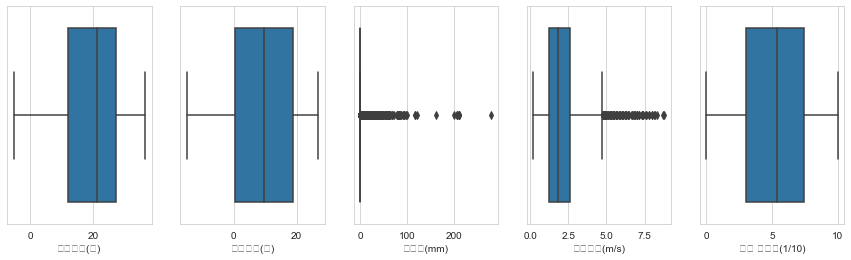

In [34]:
# 데이터프레임 df2의 구간변수 상자그림 그리기.
fig,axes = plt.subplots(1,5, figsize=(15,4))

sns.boxplot(ax=axes[0], x = '최고기온(℃)', data = df2)
sns.boxplot(ax=axes[1], x = '최저기온(℃)', data = df2)
sns.boxplot(ax=axes[2], x = '강수량(mm)', data = df2)
sns.boxplot(ax=axes[3], x = '평균풍속(m/s)', data = df2)
sns.boxplot(ax=axes[4], x = '평균 전운량(1/10)', data = df2);

### 5-4 상관관계 검토

In [35]:
# 구간 변수를 cols에 저장.
cols = ['최고기온(℃)','최저기온(℃)','강수량(mm)', '평균풍속(m/s)' ,'평균 전운량(1/10)']

# 구간 변수간 상관계수 구하기. 디폴트는 소수점 두 자리에서 반올림
round(df2[cols].corr(),2)

,최고기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균 전운량(1/10)
최고기온(℃),1.00,0.94,0.10,-0.18,0.22
최저기온(℃),0.94,1.00,0.19,-0.08,0.41
강수량(mm),0.10,0.19,1.00,0.09,0.29
평균풍속(m/s),-0.18,-0.08,0.09,1.00,0.04
평균 전운량(1/10),0.22,0.41,0.29,0.04,1.00


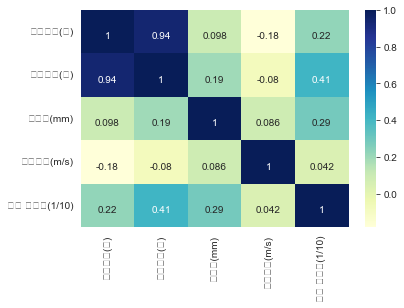

In [36]:
# 상관계수를 heatmap으로 그리기 
import seaborn as sns

corr = df2[cols].corr()
annot_kws = {'ha': 'center', 'va': 'top'}
sns.heatmap(data=corr,annot=True, annot_kws=annot_kws, cmap='YlGnBu');

In [37]:
# 지금까지 데이터처리한 데이터프레임 df2를 healthcare-dataset-2.csv 저장
df2.to_csv('태양광_데이터_통합_2.csv', index=False)

## 6. 머신러닝 모델 실행
* 머신러닝 모델 수립
* 데이터 추가 처리(문자형 데이터)
* 데이터 분할 및 대체
* 결과 파일 저장

### 6-2. 데이터 추가 처리

In [38]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('태양광_데이터_통합_2.csv')
df.shape

(4884, 8)

In [39]:
# 데이터프레임 변수 데이터타입 확인.
df.dtypes

날짜               object
발전기명             object
최고기온(℃)         float64
최저기온(℃)         float64
강수량(mm)         float64
평균풍속(m/s)       float64
평균 전운량(1/10)    float64
발전량(kWh)        float64
dtype: object

In [40]:
# 컬럼명(변수명) 구하기 
df.columns

Index(['날짜', '발전기명', '최고기온(℃)', '최저기온(℃)', '강수량(mm)', '평균풍속(m/s)',
       '평균 전운량(1/10)', '발전량(kWh)'],
      dtype='object')

In [41]:
# 컬럼명(변수명) 구하기 
list(df.columns)

['날짜',
 '발전기명',
 '최고기온(℃)',
 '최저기온(℃)',
 '강수량(mm)',
 '평균풍속(m/s)',
 '평균 전운량(1/10)',
 '발전량(kWh)']

In [42]:
# 컬럼명 구하기 
df.shape

(4884, 8)

In [43]:
# null value를 갖고 있는 변수명(컬럼명) 찾기.
df.isna().any()

날짜              False
발전기명            False
최고기온(℃)         False
최저기온(℃)         False
강수량(mm)         False
평균풍속(m/s)       False
평균 전운량(1/10)    False
발전량(kWh)        False
dtype: bool

In [44]:
data = df[['최고기온(℃)','최저기온(℃)','강수량(mm)', '평균풍속(m/s)' ,'평균 전운량(1/10)']]
data

,최고기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균 전운량(1/10)
0,28.80,15.40,0.00,0.90,4.90
1,28.60,17.70,0.00,0.80,7.90
2,20.60,17.90,22.00,1.20,9.60
3,27.00,16.80,1.50,1.70,7.50
4,27.00,14.00,0.00,1.50,5.80
5,27.70,17.00,0.00,1.10,2.50
6,28.70,16.70,0.00,0.90,4.00
7,30.40,18.50,0.00,1.10,5.10
8,30.80,19.00,0.00,1.20,4.00
9,26.40,19.20,0.00,1.20,8.90


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)

data_df_scaled = pd.DataFrame(data=data_scaled, columns = ['최고기온(℃)','최저기온(℃)','강수량(mm)', '평균풍속(m/s)' ,'평균 전운량(1/10)'])
print('feature들의 평균 값')
print(data_df_scaled.mean())
print('feature들의 분산 값')
print(data_df_scaled.var())

feature들의 평균 값
최고기온(℃)         0.00
최저기온(℃)        -0.00
강수량(mm)        -0.00
평균풍속(m/s)      -0.00
평균 전운량(1/10)    0.00
dtype: float64
feature들의 분산 값
최고기온(℃)        1.00
최저기온(℃)        1.00
강수량(mm)        1.00
평균풍속(m/s)      1.00
평균 전운량(1/10)   1.00
dtype: float64


In [46]:
df[['최고기온(℃)','최저기온(℃)','강수량(mm)', '평균풍속(m/s)' ,'평균 전운량(1/10)']] = data_df_scaled[['최고기온(℃)','최저기온(℃)','강수량(mm)', '평균풍속(m/s)' ,'평균 전운량(1/10)']]

In [47]:
# 지금까지 처리한 데이터 프레임 df를 healthcare-dataset-3.csv 파일로 저장.
df.to_csv('healthcare-dataset-3.csv',index=False)

In [48]:
df = pd.read_csv('healthcare-dataset-3.csv')

df.head(3)

,날짜,발전기명,최고기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균 전운량(1/10),발전량(kWh)
0,2021-06-01,광양항광양냉장태양광,0.98,0.60,-0.24,-0.98,-0.10,4.24
1,2021-06-02,광양항광양냉장태양광,0.96,0.82,-0.24,-1.07,0.98,3.25
2,2021-06-03,광양항광양냉장태양광,0.11,0.84,1.28,-0.72,1.60,0.73


In [49]:
target = df['발전량(kWh)']

target.shape

(4884,)

In [50]:
df.corr()['발전량(kWh)']

최고기온(℃)         0.23
최저기온(℃)         0.05
강수량(mm)        -0.31
평균풍속(m/s)       0.04
평균 전운량(1/10)   -0.57
발전량(kWh)        1.00
Name: 발전량(kWh), dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
data, target, test_size = 0.2, random_state=42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (3907, 5)
X_test shape:  (977, 5)


In [52]:
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

y_train shape:  (3907,)
y_test shape:  (977,)


In [53]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set:{:.5f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set:{:.5f}".format(tree.score(X_test, y_test)))

Accuracy on training set:0.92314
Accuracy on test set:0.67704


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6, 8, 10, 12, 13, 14, 15, 16],
    'min_samples_leaf':[1, 2 ,4, 6, 8, 12, 18],
    'min_samples_split':[1, 2 ,4, 6, 8, 16, 20]
}

stroke_model_RFR = RandomForestRegressor(n_jobs=-1)

stroke_model_RFR_grid_cv = GridSearchCV(stroke_model_RFR, param_grid = params, cv=2, n_jobs=-1)

stroke_model_RFR_grid_cv.fit(X_train, y_train)

print("Accuracy on training set:{:.5f}".format(stroke_model_RFR_grid_cv.score(X_train, y_train)))
print("Accuracy on test set:{:.5f}".format(stroke_model_RFR_grid_cv.score(X_test, y_test)))
print('최적의 하이퍼 파라미터 :',stroke_model_RFR_grid_cv.best_params_)
print('최적의 예측 정확도 :',stroke_model_RFR_grid_cv.best_score_)

Accuracy on training set:0.88596
Accuracy on test set:0.76984
최적의 하이퍼 파라미터 : {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
최적의 예측 정확도 : 0.701077264142515


In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[2 ,4 ,6, 8, 10, 12],
    'min_samples_leaf':[2 ,4, 6, 8, 12, 18, 19, 20, 21, 22],
    'min_samples_split':[2 ,4, 6, 8, 16, 20]
}

stroke_model_Gradient = GradientBoostingRegressor()

stroke_model_Gradient_grid_cv = GridSearchCV(stroke_model_Gradient, param_grid = params, cv=2, n_jobs=-1)

stroke_model_Gradient_grid_cv.fit(X_train, y_train)

print("Accuracy on training set:{:.5f}".format(stroke_model_Gradient_grid_cv.score(X_train, y_train)))
print("Accuracy on test set:{:.5f}".format(stroke_model_Gradient_grid_cv.score(X_test, y_test)))
print('최적의 하이퍼 파라미터 :',stroke_model_Gradient_grid_cv.best_params_)
print('최적의 예측 정확도 :',stroke_model_Gradient_grid_cv.best_score_)

Accuracy on training set:0.86556
Accuracy on test set:0.76277
최적의 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 6, 'n_estimators': 100}
최적의 예측 정확도 : 0.6977629887939965


In [56]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[4 ,6, 8, 10, 12, 13, 14],
    'min_samples_leaf':[2 ,4, 6, 8, 12, 18, 19, 20],
    'min_samples_split':[1, 2 ,4, 6, 8, 16, 20]
}

stroke_model_LGBM = LGBMRegressor()

stroke_model_LGBM_grid_cv = GridSearchCV(stroke_model_LGBM, param_grid = params, cv=2, n_jobs=-1)

stroke_model_LGBM_grid_cv.fit(X_train, y_train)                              
                              
print("Accuracy on training set:{:.5f}".format(stroke_model_LGBM_grid_cv.score(X_train, y_train)))
print("Accuracy on test set:{:.5f}".format(stroke_model_LGBM_grid_cv.score(X_test, y_test)))
print('최적의 하이퍼 파라미터 :',stroke_model_LGBM_grid_cv.best_params_)
print('최적의 예측 정확도 :',stroke_model_LGBM_grid_cv.best_score_)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
Accuracy on training set:0.83783
Accuracy on test set:0.75483
최적의 하이퍼 파라미터 : {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 1, 'n_estimators': 100}
최적의 예측 정확도 : 0.7002432393856739
